<a href="https://colab.research.google.com/github/Narvaal/DataScience/blob/main/ArvorePyCarros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# Use para dar upload no carros.csv e restaurante.csv
# Basta executar o comando e escolher o arquivo CLICANDO NO BOTÃO PROCURAR ABAIXO. '
import io
uploaded = files.upload()

Saving carro.csv to carro.csv


# **Implementação da árvore com a tabela Restaurantes**

In [125]:
import pandas as pd
import seaborn as sns
from google.colab import files

# Lendo o CSV 

df = pd.read_csv('/content/restaurante.csv',encoding='ISO-8859-1',sep=';')

# Removendo a coluna ID

#df = df.drop('ID',axis=1)
df.head()

,ID,EP,QR,LE,R
0,R1,Muita,Boa,Ruim,Lucro
1,R2,Muita,Boa,Boa,Lucro
2,R3,Pouca,Boa,Boa,Lucro
3,R4,Pouca,Ótima,Ruim,Prejuízo
4,R5,Pouca,Ótima,Boa,Prejuízo


In [126]:
# Removendo valores nulos

print(df.isnull().sum())
df = df.dropna().reset_index(drop=True)
df.isnull().sum() 

ID    0
EP    0
QR    0
LE    0
R     0
dtype: int64


ID    0
EP    0
QR    0
LE    0
R     0
dtype: int64

In [127]:
# Hot encode de todas as classes 

for column in df.columns:
  dumies = pd.get_dummies(df[column],prefix=column)
  df = pd.concat([df,dumies],axis=1)
  df = df.drop(column,axis=1)

df.head()

,ID_R1,ID_R2,ID_R3,ID_R4,ID_R5,ID_R6,ID_R7,ID_R8,EP_Muita,EP_Pouca,QR_Boa,QR_Ótima,LE_Boa,LE_Ruim,R_Lucro,R_Prejuízo
0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
4,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1


In [128]:
# Definindo os valores preditores e preditos
# Sendo os preditores  ['EP_Muita', 'EP_Pouca', 'QR_Boa', 'QR_Ótima ', 'LE_Boa', 'LE_Ruim']
# Sendo os preditos ['R_Lucro', 'R_Prejuízo']

y = df[['R_Lucro', 'R_Prejuízo']]
df = df.drop(['R_Lucro', 'R_Prejuízo'],axis=1)
X = df

In [129]:
from sklearn.model_selection import train_test_split

# Separando os dados para treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [130]:
from sklearn import tree

# Classificando com o modelo árvore de decisão 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.4, 0.8333333333333334, 'x[8] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [[3, 2]\n[2, 3]]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[0, 2]]'),
 Text(0.6, 0.5, 'x[6] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [[1, 2]\n[2, 1]]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [[0, 2]\n[2, 0]]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]]')]

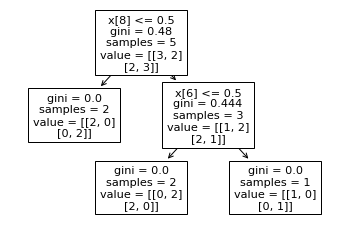

In [131]:
# Plotando o resultado da classificação

tree.plot_tree(clf)

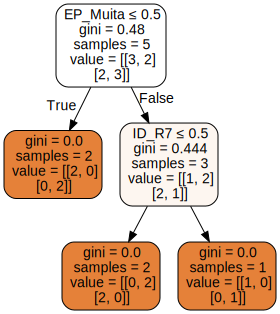

In [132]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("restaurante_grafico") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

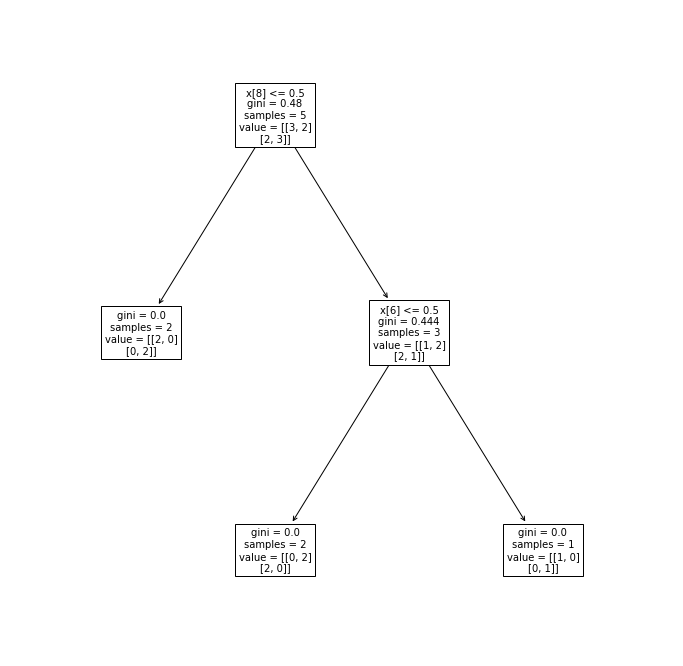

In [133]:
import matplotlib.pyplot as plt

# Plotando uma melhor imagem

plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [134]:
# Fazendo uma predição 

y_pred = clf.predict(X_test)

In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Qualidade do modelo

# Calcula o score
print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

# Matriz de classificação
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

# Score de acuracidade
print('\nAccuracy_score Report:\n')
print(accuracy_score(y_test, y_pred))

Accuracy on training set: 1.00
Accuracy on test set: 0.67

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

   micro avg       0.67      0.67      0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3
 samples avg       0.67      0.67      0.67         3


Accuracy_score Report:

0.6666666666666666


# **Implementação da árvore com a tabela Carros**





In [137]:
import pandas as pd
import seaborn as sns
from google.colab import files

# Lendo o CSV 

df = pd.read_csv('/content/carro.csv',encoding='ISO-8859-1',sep=';')

# Removendo a coluna ID

df = df.drop('ID',axis=1)
df.head()

,Gênero,Tipo de Carro,Tamanho da Camisa,Classe Social
0,M,Familiar,P,C
1,M,Esportivo,M,C
2,M,Esportivo,M,C
3,M,Esportivo,L,C
4,M,Esportivo,X,C


In [138]:
# Removendo valores nulos

print(df.isnull().sum())
df = df.dropna().reset_index(drop=True)
df.isnull().sum() 

Gênero               0
Tipo de Carro        0
Tamanho da Camisa    0
Classe Social        0
dtype: int64


Gênero               0
Tipo de Carro        0
Tamanho da Camisa    0
Classe Social        0
dtype: int64

In [139]:
# Hot encode de todas as classes 

for column in df.columns:
  dumies = pd.get_dummies(df[column],prefix=column)
  df = pd.concat([df,dumies],axis=1)
  df = df.drop(column,axis=1)

df.head()

,Gênero_F,Gênero_M,Tipo de Carro_Esportivo,Tipo de Carro_Familiar,Tipo de Carro_Luxo,Tamanho da Camisa_L,Tamanho da Camisa_M,Tamanho da Camisa_P,Tamanho da Camisa_X,Classe Social_B,Classe Social_C
0,0,1,0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,0,1,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,1
3,0,1,1,0,0,1,0,0,0,0,1
4,0,1,1,0,0,0,0,0,1,0,1


In [140]:
# Definindo os valores preditores e preditos
# Sendo os preditores  ['Gênero_F', 'Gênero_M', 'Tipo de Carro_Esportivo',Tipo de Carro_Familiar', 'Tipo de Carro_Luxo', 'Tamanho da Camisa_L','Tamanho da Camisa_M', 'Tamanho da Camisa_P', 'Tamanho da Camisa_X']
# Sendo os preditos ['Classe Social_B', 'Classe Social_C']

y = df[['Classe Social_B', 'Classe Social_C']]
df = df.drop(['Classe Social_B', 'Classe Social_C'],axis=1)
X = df

In [141]:
from sklearn.model_selection import train_test_split

# Separando os dados para treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [142]:
from sklearn import tree

# Classificando com o modelo árvore de decisão 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.7142857142857143, 0.9166666666666666, 'x[2] <= 0.5\ngini = 0.5\nsamples = 14\nvalue = [[7, 7]\n[7, 7]]'),
 Text(0.5714285714285714, 0.75, 'x[6] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [[2, 7]\n[7, 2]]'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[8] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [[2, 4]\n[4, 2]]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [[2, 2]\n[2, 2]]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]]'),
 Text(0.42857142857142855, 0.25, 'x[7] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [[1, 2]\n[2, 1]]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [[1, 1]\n[1, 1]]'),
 Text(0.5714285714285714, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(0.5714285714285714, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [[0, 2]\n[2, 0]]'),
 Text(0.7142857142857143, 0.5833333333333334, 'gini = 0.0\nsample

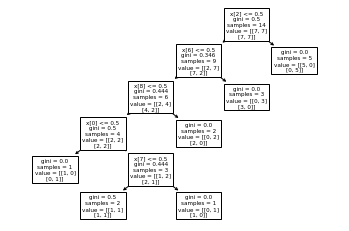

In [143]:
# Plotando o resultado da classificação

tree.plot_tree(clf)

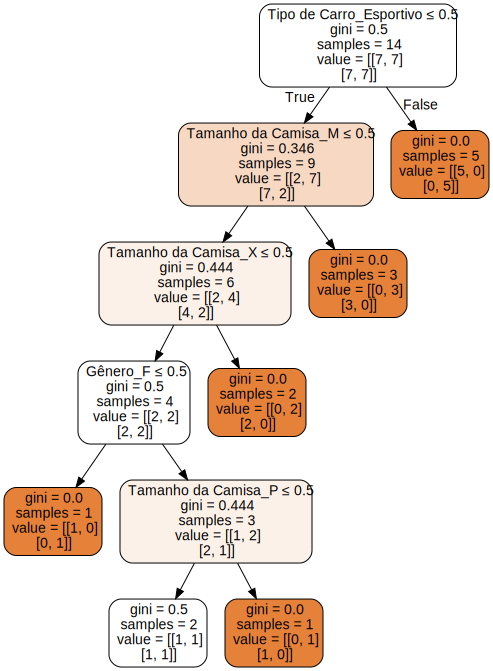

In [144]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("carros_grafico") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

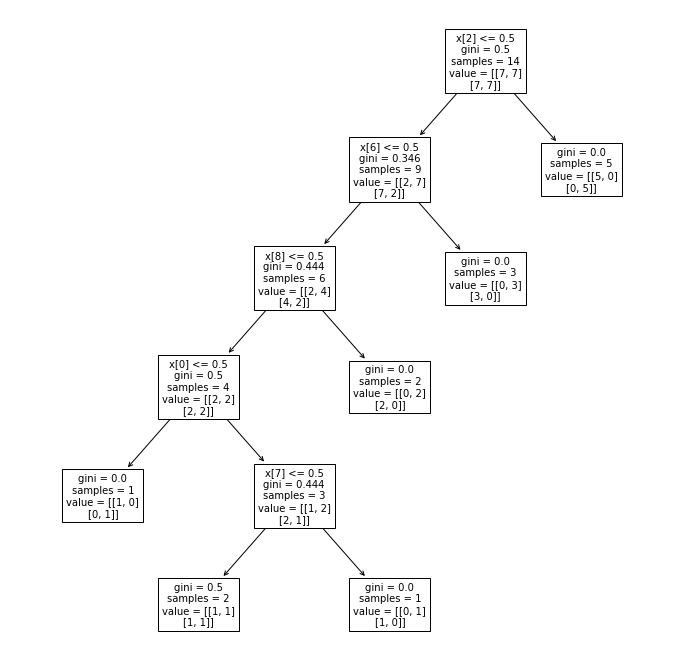

In [145]:
import matplotlib.pyplot as plt

# Plotando uma melhor imagem

plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [146]:
# Fazendo uma predição 

y_pred = clf.predict(X_test)

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Qualidade do modelo

# Calcula o score
print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

# Matriz de classificação
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

# Score de acuracidade
print('\nAccuracy_score Report:\n')
print(accuracy_score(y_test, y_pred))

Accuracy on training set: 0.86
Accuracy on test set: 0.83

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

   micro avg       0.83      0.83      0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6
 samples avg       0.83      0.83      0.83         6


Accuracy_score Report:

0.8333333333333334



# **Analise dos resultados**

Durante a execução do referido exercício, foram avaliadas duas bases de dados,  a base de dados referente aos carros e a base de dados do restaurante. Os resultados obtidos indicam que a base de dados dos carros apresentou um desempenho superior em relação à base de dados do restaurante, no que se refere à capacidade de predição de dados.

Os resultados obtidos na base de dados dos carros revelaram que houve uma taxa de acerto de 86% nos dados de treino, ou seja, foram corretamente preditos 86% dos dados utilizados para treinar o modelo de predição. Além disso, a base de teste apresentou uma taxa de acerto de 83%, o que evidencia a qualidade da classficação em generalizar os dados.

Por outro lado, os resultados obtidos na base de dados do restaurante foram inferiores, apesar de ter sido obtida uma taxa de acerto de 100% nos dados de treino. Ao avaliar a base de teste, constatou-se que apenas 67% dos dados foram corretamente preditos, indicando uma menor qualidade na classificação de dados e na capacidade do modelo em generalizar. 